# Freda Data

In [1]:
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf # type: ignore
from statsmodels.tsa.stattools import acf # type: ignore
import matplotlib.pyplot as plt # type: ignore
import os
import matplotlib as mpl # type: ignore
label_size = 12
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
data = pd.read_csv(os.path.join(os.getcwd(), "moveHMM_Elephant_data_24hrs.csv"))

In [2]:
#to supress warnings
import warnings     
warnings.filterwarnings('ignore') 

In [3]:
data.head()

,Step,latitude,longitude,ID,timestamp,states
0,0,-0.962608,101.974244,14,2015-03-13 20:22:17.000,1
1,1,-0.962602,101.974213,14,2015-03-13 20:26:19.000,1
2,2,-0.962636,101.974335,14,2015-03-13 20:30:32.000,1
3,3,-0.962615,101.974275,14,2015-03-13 20:35:31.000,1
4,4,-0.962658,101.974258,14,2015-03-13 20:40:36.000,1


In [4]:
ID = data["ID"].unique()

In [5]:
ID

array([  14,   45,  104,  217,  249,  323,  431,  432,  460,  465,  468,
        471,  482,  507,  541,  543,  562,  648,  661,  664,  985,  992,
       1005, 1242, 1267, 1306, 1321, 1324, 1327, 1345, 1357, 1372, 1373,
       1377, 1399, 1405, 1416, 1420, 1447, 1450, 1459, 1464, 1467, 1475,
       1501, 1512, 1608])

In [6]:
LAT = data["latitude"]
LON = data["longitude"]

In [7]:
import geopy.distance # type: ignore

dist = []

for i in range(0, len(data) - 1):
    coords_1 = [ LAT[i], LON[i]]
    coords_2 = [ LAT[i+1], LON[i+1]]
    dist.append(geopy.distance.geodesic(coords_1, coords_2).km)
dist.append(np.nan)

In [8]:
data["step"] = dist

In [9]:
for id in ID:
    
    #print(data[data["ID"] == id])
    data_id = data[data["ID"] == id].reset_index()

    fig, ax = plt.subplots(figsize=(6.8, 4))

    plot_acf(data_id["step"].values[0:-1],lags=100, ax=ax)
    fig.set_tight_layout(tight=True)
    ax.set_title("Animal ID: "+ str(id), fontdict={"size": 20})
    ax.set_xlabel("Lags", fontdict={"size": 18})
    ax.set_ylabel("Autocorrelation", fontdict={"size": 18})
    plt.grid()
    plt.savefig(os.path.join(os.getcwd(), "autocorrelation/acf_" + str(id) + "_.png"), dpi=300)

    plt.close()
    
    #acf_values = acf(data_id["step"].values[0:-1], nlags=10, alpha = 0.05, fft = False)
    #print(acf_values)

In [10]:
net_distance = []
diel_distance = []

for id in ID:

    data_id = data[data["ID"] == id].reset_index()
    len_id = len(data_id)

    for i in range(0, len_id, 288):
        day_data=data_id[i*288:i*288+288]
        if len(day_data) == 288:

            diel_distance.append(sum(day_data["step"]))

            coords_1 = [ day_data.head(1)["latitude"].values[0], day_data.head(1)["longitude"].values[0]]
            coords_2 = [ day_data.tail(1)["latitude"].values[0], day_data.tail(1)["longitude"].values[0]]
            
            net_distance.append(geopy.distance.geodesic(coords_1, coords_2).km)

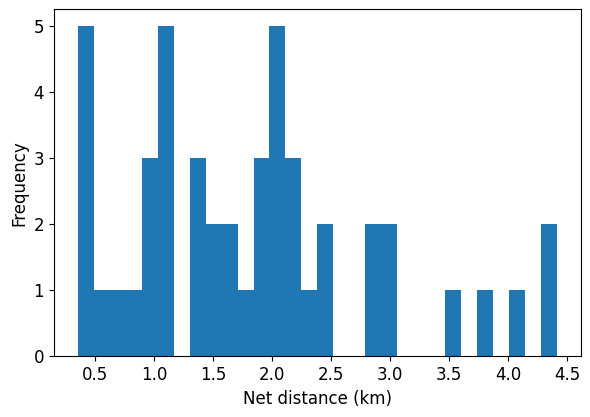

In [11]:
fig, ax = plt.subplots(figsize=(6.8, 4.5))
ax.hist(net_distance, bins = 30)
ax.set_xlabel("Net distance (km)", fontdict={"size": 12})
ax.set_ylabel("Frequency", fontdict={"size": 12})
plt.savefig(os.path.join(os.getcwd(), "net_distance_hist.png"), dpi=300, bbox_inches='tight')

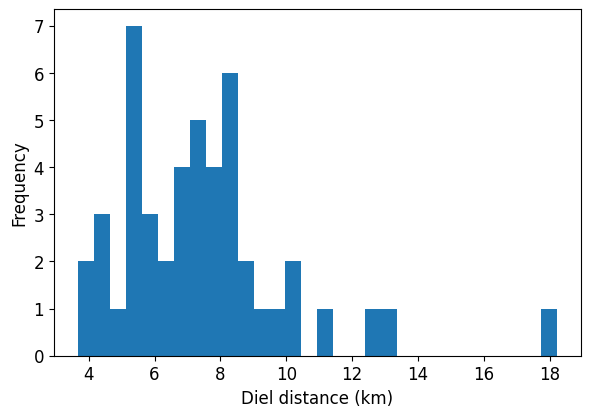

In [12]:
fig, ax = plt.subplots(figsize=(6.8, 4.5))
ax.hist(diel_distance, bins = 30)
ax.set_xlabel("Diel distance (km)", fontdict={"size": 12})
ax.set_ylabel("Frequency", fontdict={"size": 12})
plt.savefig(os.path.join(os.getcwd(), "diel_distance_hist.png"), dpi=300, bbox_inches='tight')

# plt.boxplot(net_distance)

In [13]:
np.average(net_distance)

np.float64(1.828163121937177)

In [14]:
np.average(diel_distance)

np.float64(7.4431506651690915)

In [15]:
fig, ax = plt.subplots(figsize=(6.8, 4.5))
ax.boxplot(net_distance)
ax.set_ylabel("Net distance (km)", fontdict={"size": 12})
ax.set_xticks([])       #remove x-ticks
# plt.grid()
plt.savefig(os.path.join(os.getcwd(), "net_distance_boxplot.png"), dpi=300, bbox_inches='tight')
plt.close()

fig, ax = plt.subplots(figsize=(6.8, 4.5))
ax.boxplot(diel_distance)
ax.set_ylabel("Diel distance (km)", fontdict={"size": 12})
ax.set_xticks([])       #remove x-ticks
# plt.grid()
plt.savefig(os.path.join(os.getcwd(), "diel_distance_boxplot.png"), dpi=300, bbox_inches='tight')
plt.close()

In [16]:
from scipy.stats import gamma

shape, loc, scale = gamma.fit(diel_distance, scale = 1, loc=0.012)
print("shape: ", shape)
print("scale: ", scale)
x = np.linspace(0, 20, 500)
pdf_fitted = gamma.pdf(x, shape, loc, scale)
fig, ax = plt.subplots(figsize=(6.8, 4.5))
plt.plot(x, pdf_fitted,'r-', label='fitted gamma pdf')
plt.hist(diel_distance, bins = 30, density=True)
ax.set_xlabel("Diel distance (km)", fontdict={"size": 12})
ax.set_ylabel("Frequency", fontdict={"size": 12})
plt.legend()
plt.savefig(os.path.join(os.getcwd(), "diel_distance_gamma.png"), dpi=300, bbox_inches='tight')
plt.close()

shape:  2.7302366086985277
scale:  1.559367856250987


In [17]:
from scipy.stats import weibull_min

shape, loc, scale = weibull_min.fit(diel_distance, scale = 1, loc=0.012)
alpha = 0.05
lower = weibull_min.ppf(alpha/2, shape, loc, scale)
upper = weibull_min.ppf(1.-alpha/2, shape, loc, scale)
x = np.linspace(0, 20, 500)
pdf_fitted =  weibull_min.pdf(x, shape, loc, scale)

fig, ax = plt.subplots(figsize=(6.8, 4.5))
plt.plot(x, pdf_fitted, 'r-', label='fitted weibull pdf')
plt.hist(diel_distance, bins = 30, density=True)
ax.set_xlabel("Diel distance (km)", fontdict={"size": 12})
ax.set_ylabel("Frequency", fontdict={"size": 12})
plt.legend()
plt.savefig(os.path.join(os.getcwd(), "diel_distance_weibull.png"), dpi=300, bbox_inches='tight')
plt.close()

In [18]:
shape, loc, scale = weibull_min.fit(net_distance, scale = 1, loc=3.63)
alpha = 0.05
lower = weibull_min.ppf(alpha/2, shape, loc, scale)
upper = weibull_min.ppf(1.-alpha/2, shape, loc, scale)
x=np.linspace(0,20,500)
pdf_fitted =  weibull_min.pdf(x, shape, loc, scale)

fig, ax = plt.subplots(figsize=(6.8, 4.5))
plt.plot(x, pdf_fitted, 'r-', label='fitted weibull pdf')
plt.hist(net_distance, bins = 30, density=True)
ax.set_xlabel("Net distance (km)", fontdict={"size": 12})
ax.set_ylabel("Frequency", fontdict={"size": 12})
plt.legend()
plt.savefig(os.path.join(os.getcwd(), "net_distance_weibull.png"), dpi=300, bbox_inches='tight')
plt.close()